# Clusters espaciales

> Libreria de ejemplo para crear clusters espaciales

In [1]:
#| default_exp clusters_espaciales

In [2]:
#| hide
from nbdev.showdoc import *

In [3]:
#| hide
#| export
from nbdev.showdoc import *
import matplotlib
import sklearn
import random
import numpy as np
import shapely
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt

In [4]:
#| export
class data_points:
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None):
        random.seed(seed)
        
        Xpoint = np.random.uniform(low= min_x, high= max_x, size=n)
        Ypoint = np.random.uniform(low= min_y, high= max_y, size=n)
        
        #self.Points = np.random.uniform(low= min_x, high= max_x, size=(n, 2))
        self.Points = [shapely.Point(x[0],x[1]) for x in zip(Xpoint, Ypoint)]
            
    def get_points(self):
        """Una funcion que para obtener los puntos"""
        return self.Points
    
    def get_Multypoint(self):
        """Regresa un objeto MultiPoint con los puntos"""
        return shapely.geometry.MultiPoint(self.Points)
 
    def get_X(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]
    
    def get_Y(self):
        """Regresa las coordenadas X"""
        return [x.y for x in self.Points]
    
    def centroid(self):
        """Regresa el centroide de los puntos """
        return shapely.centroid(self.get_Multypoint())

    def as_array(self):
        """Regresa los puntos como un array"""
        list_arrays = np.array([ (geom.xy[0][0], geom.xy[1][0]) for geom
        in self.Points])
        return list_arrays
        
    def add_points(self, data_points):
        """Agrega puntos de otra """
        self.Points = self.Points + data_points.Points
        return

## data_points
 data_points (n, min_x=0, min_y=0, max_x=1, max_y=1, seed=None
 )
Una clase que contiene a los dats

Es para mostrar como funciona

In [5]:
datos_simples = data_points(500, min_x = .75, min_y= .75, max_x= 1, max_y= 1 )

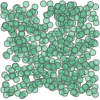

In [6]:
datos_simples.get_Multypoint()

## data_points.get_Multypoint

 data_points.get_Multypoint (
 )
Regresa un objeto MultiPoint con los punt

Regresa un objeto MultiPoint con los puntosos

## Clusters
 Clusters (data_points_i, seed=1234)
*Clase para generar los clusters a partir de un objeto de la clase data_points

Esta clase se utiliza para generar los distintos tipos de clusterizaciones, se almacena los datos en una estructura de datos y se le añaden las respectivas classes*

In [7]:
datos_simples_3 = data_points(500, min_x = 0.6, min_y= 0.6, max_x= 1.0,
max_y= 1.0 )
datos_simples_2 = data_points(500, min_x = 0.0, min_y= 0.6, max_x= 0.4,
max_y= 1.0 )
datos_simples_1 = data_points(500, min_x = 0.6, min_y= 0.0, max_x= 1.0,
max_y= 0.4 )
datos_simples_0 = data_points(500, min_x = 0.0, min_y= 0.0, max_x= 0.4,
max_y= 0.4 )

In [8]:
datos_simples_0.add_points(datos_simples_1)
datos_simples_0.add_points(datos_simples_2)
datos_simples_0.add_points(datos_simples_3)

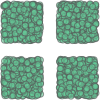

In [9]:
datos_simples_0.get_Multypoint()

In [10]:
#| export
class Clusters:
    """Clase para generar los clusters a partir de un objeto de la clase data_points
    Esta clase se utiliza para generar los distintos tipos de clusterizaciones, 
    se almacena los datos en una estructura de datos y se le añaden las respectivas 
    classes
    """
    def __init__(self, data_points_i, seed=1234):
        if seed != None:
            random.seed(seed)
            self.data_structure = data_points_i
    
    def KMeans(self, **kwargs):
        """
        Se usa el algoritmo Kmeans para la obtencion de clusters, 
        las clases quedan almacenadas en .data_structure_classes_Kmeans.
        Si se desea obtener el modelo se tiene que añadir
        (ret_model = True) como parámetro.
        """
        kmeans_c = KMeans(**kwargs)
        classes_val = kmeans_c.fit_predict(self.data_structure.as_array())
        self.data_structure.classes_Kmeans = classes_val
        if 'ret_model' in kwargs and kwargs['ret_model']==True:
            return kmeans_c
    
    def DBSCAN(self, **kwargs):
        """
        Se DBSCAN para la obtencion de clusters, las clases quedan almacenadas
        en .data_structure_classes_DBSCAN. Si se desea obtener el modelo se tiene
        que añadir (ret_model = True) como parámetro."""
        db = DBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_DBSCAN = db.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True:
            return db
    
    def HDBSCAN(self, **kwargs):
        """
        Se HDBSCAN para la obtencion de clusters, las clases quedan almacenadas
        en .data_structure_classes_HDBSCAN. Si se desea obtener el modelo se tiene
        que añadir (ret_model = True) como parámetro.
        """
        hdb = HDBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_HDBSCAN = hdb.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True:
            return hdb
    
    def OPTICS(self, **kwargs):
        """
        Se usa el algoritmo OPTICS para la obtencion de clusters,
        las clases quedan almacenadas en .data_structure_classes_OPTICS.
        Si se desea obtener el modelo se tiene que añadir 
        (ret_model = True) como parámetro.
        """
        optics= OPTICS(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_OPTICS = optics.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True:
            return optics


In [11]:
cluster_all = Clusters(datos_simples_0)

In [12]:
cluster_all.OPTICS()
cluster_all.HDBSCAN()
cluster_all.DBSCAN(eps=0.1, min_samples=10)
cluster_all.KMeans(n_clusters=10, n_init=10)

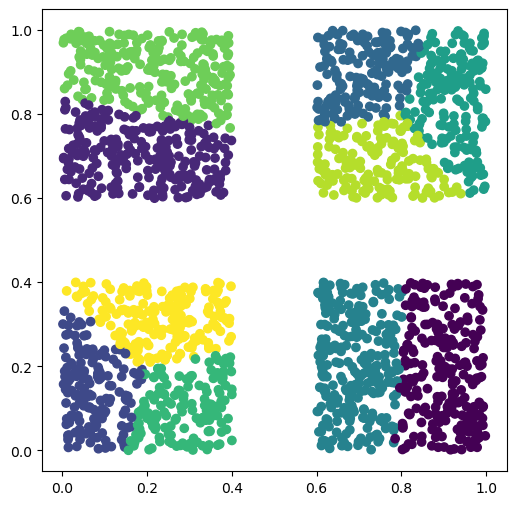

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(cluster_all.data_structure.get_X(), 
            cluster_all.data_structure.get_Y(),
           c = cluster_all.data_structure.classes_Kmeans
)

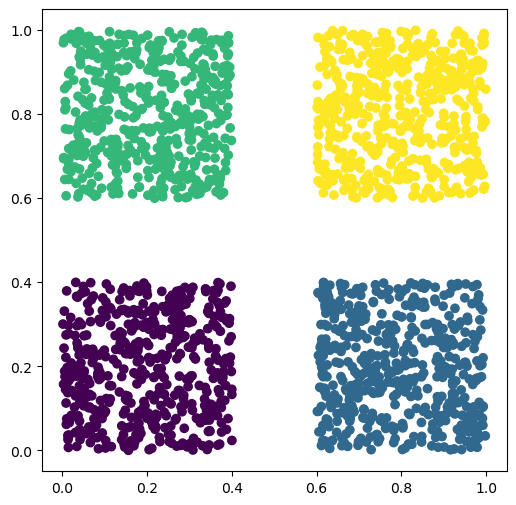

In [14]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
cluster_all.data_structure.get_X(),
cluster_all.data_structure.get_Y(),
c = cluster_all.data_structure.classes_DBSCAN
)

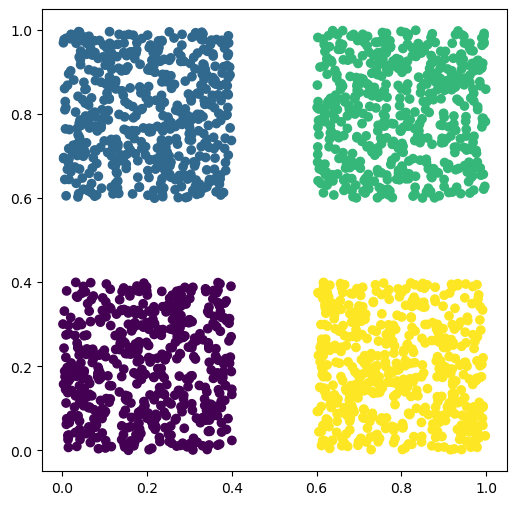

In [15]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
cluster_all.data_structure.get_X(),
cluster_all.data_structure.get_Y(),
c = cluster_all.data_structure.classes_HDBSCAN
)

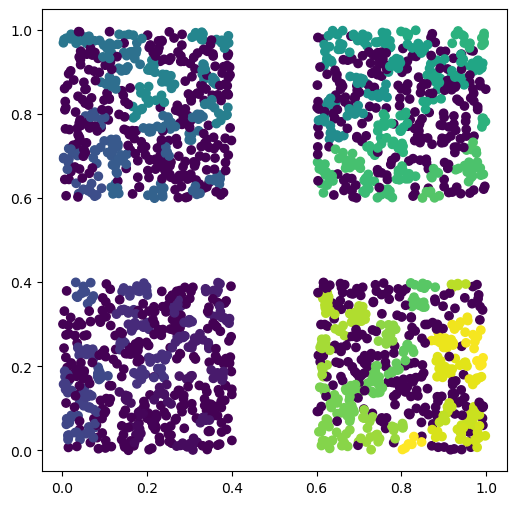

In [16]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
cluster_all.data_structure.get_X(),
cluster_all.data_structure.get_Y(),
c = cluster_all.data_structure.classes_OPTICS)

In [17]:
#| hide
import nbdev; nbdev.nbdev_export()